In [6]:
import pandas as pd
import matplotlib.pyplot as mlp
pol=pd.read_csv(r'C:/Users\deepajay\Desktop\PY\ds\Jupitar\jupyter/NYPD_Complaint_Data_Current__Year_To_Date_.csv')
print(pol.keys())
print(pol['SUSP_SEX'])
print(pol['SUSP_SEX'].describe())
print(pol.shape)


Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD',
       'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lat_Lon', 'New Georeferenced Column'],
      dtype='object')
0              M
1              M
2              M
3         (null)
4              M
           ...  
209824         M
209825    (null)
209826    (null)
209827         M
209828         F
Name: SUSP_SEX, Length: 209829, dtype: object
count     209829
unique         4
top            M
freq       98652
Name: SUSP_SEX, dtype: object
(209829, 36)


In [7]:
numerical_cols = list(pol.select_dtypes(exclude=['object']))
print("object")
print(numerical_cols)
print('------'*10)
category_cols = list(pol.select_dtypes(include=['object']))
print("categrorical")
print(category_cols)
print('------'*10)

object
['ADDR_PCT_CD', 'HOUSING_PSA', 'JURISDICTION_CODE', 'KY_CD', 'PD_CD', 'TRANSIT_DISTRICT', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude']
------------------------------------------------------------
categrorical
['CMPLNT_NUM', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT', 'JURIS_DESC', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'Lat_Lon', 'New Georeferenced Column']
------------------------------------------------------------


C:\Users\deepajay\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


C:\Users\deepajay\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\deepajay\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



------------------------------------------------------------------------------------------------------------------------


C:\Users\deepajay\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



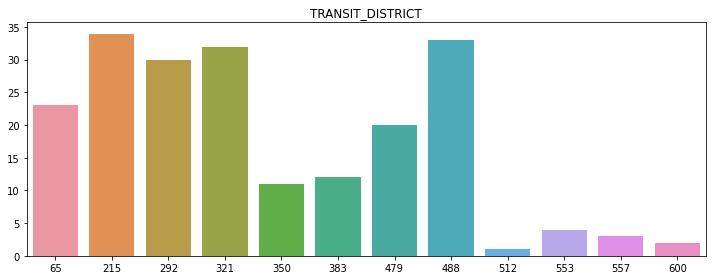

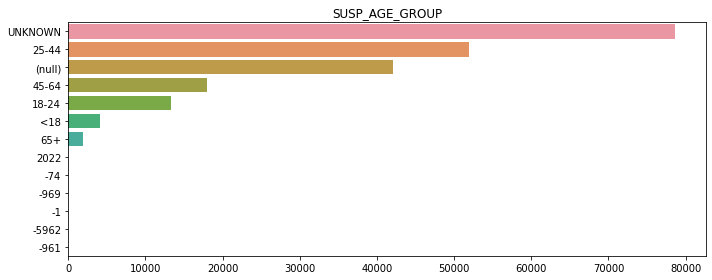

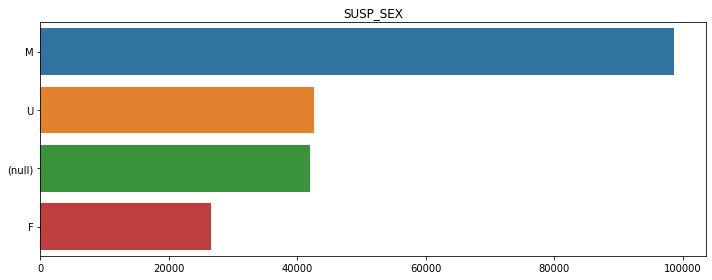

In [127]:
import seaborn as sns
mlp.figure(figsize=(10,4))
sns.barplot(pol['TRANSIT_DISTRICT'].value_counts().values, pol['TRANSIT_DISTRICT'].value_counts().index)
mlp.title('TRANSIT_DISTRICT')
mlp.tight_layout()
print("------"*20)
mlp.figure(figsize=(10,4))
sns.barplot(pol['SUSP_AGE_GROUP'].value_counts().values, pol['SUSP_AGE_GROUP'].value_counts().index)
mlp.title('SUSP_AGE_GROUP')
mlp.tight_layout()
print("------"*20)
mlp.figure(figsize=(10,4))
sns.barplot(pol['SUSP_SEX'].value_counts().values, pol['SUSP_SEX'].value_counts().index)
mlp.title('SUSP_SEX')
mlp.tight_layout()
print("------"*20)
mlp.figure(figsize=(720,300))
sns.barplot(pol['PD_DESC'].value_counts().values, pol['PD_DESC'].value_counts().index)
mlp.title('PD_DESC')
mlp.tight_layout()

In [ ]:
from collections import Counter
code=Counter(pol.SUSP_SEX)
coss=code.most_common(10000)
print(coss)
x, y=zip(*coss)
x,y=list(x),list(y)
name=pd.DataFrame(x)
sup=pd.DataFrame(y)
cot=pd.concat([name.loc[:,0],sup.loc[:,0]],axis=1)
cot.columns="SUSP_SEX","Coss"
cot.head(20)

[('M', 98652), ('U', 42607), ('(null)', 42036), ('F', 26534)]


,SUSP_SEX,Coss
0,M,98652
1,U,42607
2,(null),42036
3,F,26534


In [ ]:
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go 
init_notebook_mode(connected=True)
val=cot.SUSP_SEX
fig={ 'data':[{'values':cot.iloc[:, 1], 'labels':val, 'name':'SUSP_SEX','hoverinfo':'label+percent+name'
            , 'hole':.4, 'type':'pie'}],
     'layout':{
         'title':"log of 1000 wikipedia", 'annotations':[{'font':{'size': 20}, 'showarrow':False,'text':'Total',
                                'x': .5,'y': .5}]
     }
}
iplot(fig)

[('M', 98652), ('U', 42607), ('(null)', 42036), ('F', 26534)]


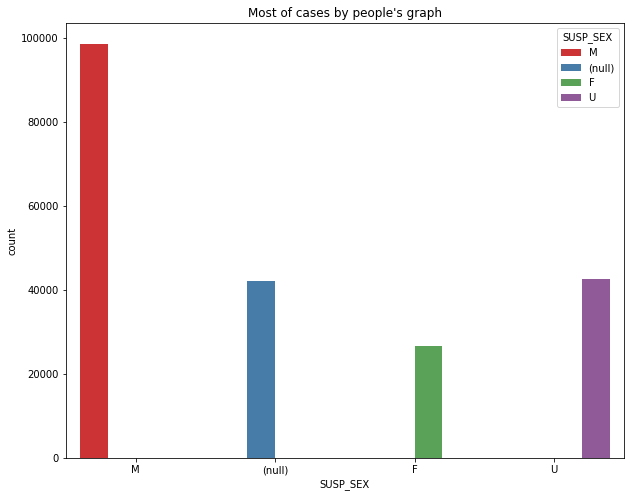

In [ ]:
import seaborn as sns
print(coss)
f, ax=mlp.subplots(figsize=(10,8))
ax=sns.countplot(x="SUSP_SEX" , hue='SUSP_SEX',data=pol,palette="Set1")
ax.set_title("Most of cases by people's graph")
mlp.show()

In [ ]:
# Most of the Cases in which station
print(pol['PD_DESC'])
print(pol['PD_DESC'].describe())
print(pol['PD_DESC'].shape)


0                   TAMPERING 1,CRIMINAL
1                                 RAPE 1
2                       SEXUAL ABUSE 3,2
3              FRAUD,UNCLASSIFIED-FELONY
4                                 RAPE 1
                       ...              
209824                         ASSAULT 3
209825             HARASSMENT,SUBD 3,4,5
209826    CRIMINAL MISCHIEF 4TH, GRAFFIT
209827             HARASSMENT,SUBD 3,4,5
209828          ASSAULT 2,1,UNCLASSIFIED
Name: PD_DESC, Length: 209829, dtype: object
count                    209829
unique                      313
top       HARASSMENT,SUBD 3,4,5
freq                      24785
Name: PD_DESC, dtype: object
(209829,)


In [ ]:
from collections import Counter
code=Counter(pol.PD_DESC)
coss=code.most_common(100)
print(coss)
x, y=zip(*coss)
x,y=list(x),list(y)
name=pd.DataFrame(x)
sup=pd.DataFrame(y)
cot=pd.concat([name.loc[:,0],sup.loc[:,0]],axis=1)
cot.columns="PD_DESC","Coss"
cot.head(20)

[('HARASSMENT,SUBD 3,4,5', 24785), ('LARCENY,PETIT FROM STORE-SHOPL', 22173), ('ASSAULT 3', 16677), ('HARASSMENT,SUBD 1,CIVILIAN', 8544), ('ASSAULT 2,1,UNCLASSIFIED', 7505), ('AGGRAVATED HARASSMENT 2', 7243), ('CRIMINAL MISCHIEF,UNCLASSIFIED 4', 5378), ('MISCHIEF, CRIMINAL 4, OF MOTOR', 4648), ('LARCENY,GRAND OF AUTO', 4434), ('MENACING,UNCLASSIFIED', 4392), ('LARCENY,PETIT FROM AUTO', 4348), ('CRIMINAL CONTEMPT 1', 3827), ('LARCENY,PETIT FROM BUILDING,UNATTENDED, PACKAGE THEFT INSIDE', 3812), ('LARCENY,PETIT OF VEHICLE ACCES', 3472), ('CRIMINAL MISCHIEF 4TH, GRAFFIT', 3165), ('LEAVING SCENE-ACCIDENT-PERSONA', 3153), ('LARCENY,PETIT FROM BUILDING,UN', 2976), ('MISCHIEF,CRIMINAL,    UNCL 2ND', 2827), ('LARCENY,GRAND FROM VEHICLE/MOTORCYCLE', 2346), ('LARCENY,PETIT FROM OPEN AREAS,', 2345), ('LARCENY,GRAND FROM STORE-SHOPL', 2243), ('MISCHIEF, CRIMINAL 3 & 2, OF M', 2195), ('LARCENY,PETIT OF LICENSE PLATE', 2177), ('BURGLARY,COMMERCIAL,NIGHT', 1739), ('STRANGULATION 1ST', 1665), ('CONTRO

,PD_DESC,Coss
0,"HARASSMENT,SUBD 3,4,5",24785
1,"LARCENY,PETIT FROM STORE-SHOPL",22173
2,ASSAULT 3,16677
3,"HARASSMENT,SUBD 1,CIVILIAN",8544
4,"ASSAULT 2,1,UNCLASSIFIED",7505
5,AGGRAVATED HARASSMENT 2,7243
6,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",5378
7,"MISCHIEF, CRIMINAL 4, OF MOTOR",4648
8,"LARCENY,GRAND OF AUTO",4434
9,"MENACING,UNCLASSIFIED",4392


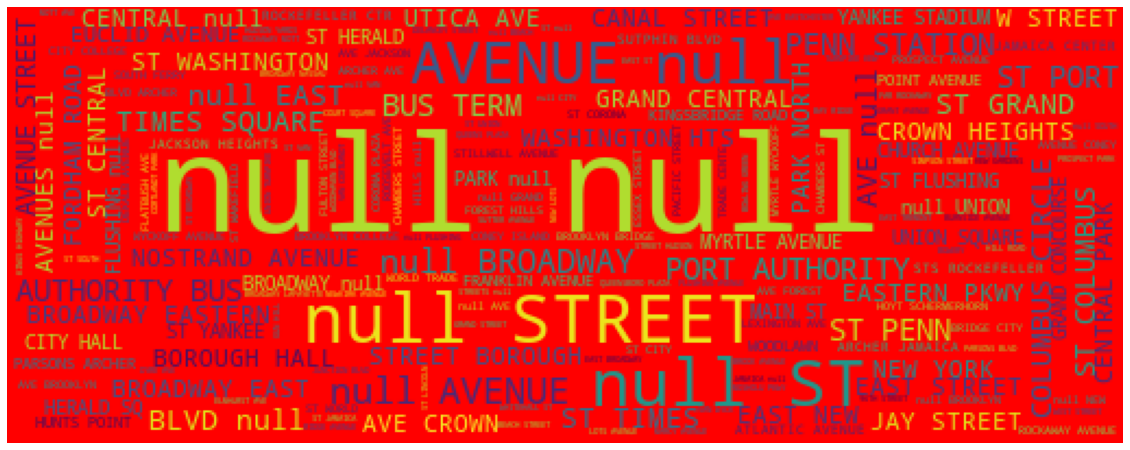

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as mlp
periods=pol.loc[(pol['ADDR_PCT_CD']>=1)&(pol['ADDR_PCT_CD']<=200)]
items=periods.STATION_NAME
mlp.subplots(figsize=(20,10))
wordcloud=WordCloud(background_color="red",width=512,height=200).generate("".join(items))
mlp.imshow(wordcloud)
mlp.axis('off')
mlp.show()